In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pdfrw import PdfReader
import re
import os
from datetime import datetime

In [65]:
os.listdir(os.getcwd())
test = pd.read_csv("SBE19_noh", names = ["Temperature", 'Conductivity', 'Pressure', 'Oxygen Temperature', 'Dissolved Oxygen', 'Salinity', 'Sound Velocity'])
test.head()
control = pd.read_csv('SBE37.cap')
control.head()

,Devide ID,Serial Number,Temperature,Conductivity,Pressure,Date,Time
0,20,3705695.0,23.6782,2.49079,0.249,02 Feb 2018,08:37:42
1,20,3705695.0,23.6826,2.48882,0.249,02 Feb 2018,08:37:44
2,20,3705695.0,23.6860,2.48872,0.256,02 Feb 2018,08:37:47
3,20,3705695.0,23.6882,2.48994,0.249,02 Feb 2018,08:37:49
4,20,3705695.0,23.6886,2.49004,0.249,02 Feb 2018,08:37:52


In [17]:
x=PdfReader('tempcal.pdf')
x.keys()

['/Size', '/Root', '/Info', '/ID']

In [18]:
x.Info

{'/Author': '(jwymore)',
 '/CreationDate': '(D:20151109131230)',
 '/Creator': '(PScript5.dll Version 5.2.2)',
 '/ModDate': '(D:20151109131230)',
 '/Producer': '(GPL Ghostscript 8.15)',
 '/Title': '(CondCalibrationReport)'}

In [19]:
y = x.pages[0].pdfstring

In [20]:
import PyPDF2

In [46]:
pdfFileObj = open('sbe19.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
pdf_str = pageObj.extractText()
pdf_str

'                                   f = Instrument Output (Hz) / 1000.0t = temperature (°C);    p = pressure (decibars);    d = CTcor;    e = CPcor;Conductivity (S/m) = (g + h * f2+ i * f3 + j * f4) /10 (1 + d * t + e * p)Residual (Siemens/meter) = instrument conductivity - bath conductivitySea-Bird Electronics, Inc.13431 NE 20th Street, Bellevue, WA 98005-2010 USAPhone: (+1) 425-643-9866 Fax (+1) 425-643-9954 Email: seabird@seabird.comSENSOR SERIAL NUMBER: 6000CALIBRATION DATE: 16-Mar-17SBE 19plus V2 CONDUCTIVITY CALIBRATION DATAPSS 1978: C(35,15,0) = 4.2914 Siemens/meterCOEFFICIENTS:g = -1.070115e+000h =  1.666822e-001i = -2.133476e-003j =  1.694100e-004CPcor = -9.5700e-008CTcor =  3.2500e-006BATH TEMP(° C)BATH SAL(PSU)BATH COND(S/m)INSTRUMENTOUTPUT (Hz)INSTRUMENTCOND (S/m)RESIDUAL(S/m)22.00001.00004.500015.000018.500024.000029.000032.50000.000034.799734.780034.737934.729034.719334.714134.71100.000002.974683.281644.263014.608045.165795.687466.059702567.605024.135212.605773.325957.646

In [49]:
m = re.search('(SERIAL NUMBER: ).{4}' , pdf_str)
m.group(0)[-4:]

'6000'

In [22]:
df = pd.read_csv('dummydata.csv')
df = df.drop(df.index[0])
df.head()

,btemp,bsal,bcond,ioutput,icond,Residual
1,1.0,34.7997,2.97468,5024.13,2.9746,-0.00006
2,4.5,34.7800,3.28164,5212.60,3.2817,0.00006
3,15.0,34.7379,4.26301,5773.32,4.2631,0.00004
4,18.5,34.7290,4.60804,5957.64,4.6080,-0.00002
5,24.0,34.7193,5.16579,6243.79,5.1657,-0.00006


In [23]:
df2 = pd.read_csv('dummydata.csv')
df2 = df2.drop(df2.index[0])
df2 = df2.multiply(1.1)
df2.head()

,btemp,bsal,bcond,ioutput,icond,Residual
1,1.10,38.27967,3.272148,5526.543,3.27206,-0.000066
2,4.95,38.25800,3.609804,5733.860,3.60987,0.000066
3,16.50,38.21169,4.689311,6350.652,4.68941,0.000044
4,20.35,38.20190,5.068844,6553.404,5.06880,-0.000022
5,26.40,38.19123,5.682369,6868.169,5.68227,-0.000066


In [43]:
def frange_list(start, stop, step):
    i = start
    lst = []
    while i < stop:
        lst.append(i)
        i += step
    return lst

#dfo = pd.DataFrame(np.asarray(frange_list(1.3, 30.2, .125)))


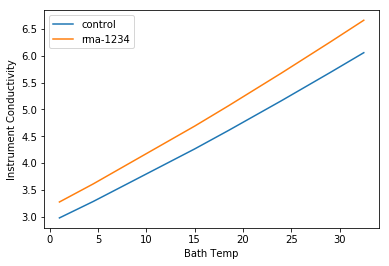

In [42]:
#ax = plt.subplot(111)
xax = np.asarray(frange_list(3.27,5.7, .125))
plt.plot(df['btemp'], df['icond'], label="control")
plt.plot(df['btemp'], df2['icond'], label='rma-1234')
plt.xlabel("Bath Temp")
plt.ylabel("Instrument Conductivity")
leg = plt.legend(loc='best')
plt.show()

In [107]:
control = pd.read_csv('SBE37.cap')
control.describe
rma = pd.read_csv('SBE19_noh', names=["Temperature", 'Conductivity', 'Pressure', 'Oxygen Temperature', 'Dissolved Oxygen', 'Salinity', 'Sound Velocity'])
rma = rma.drop(rma.index[0])
rma.head()

,Temperature,Conductivity,Pressure,Oxygen Temperature,Dissolved Oxygen,Salinity,Sound Velocity
1,22.2149,1.98132,0.179,17.427,0.644303,12.5492,1502.869
2,22.2158,1.98136,0.177,17.427,0.644303,12.5491,1502.871
3,22.2167,1.98136,0.179,17.378,0.644297,12.5489,1502.873
4,22.2178,1.98136,0.180,17.378,0.644297,12.5486,1502.876
5,22.2187,1.98137,0.180,17.378,0.644297,12.5484,1502.878


In [128]:
#time = datetime.strptime(control[' Time'].index[0], "%H:%M:%S")

control[' Time']


1      08:37:44
2      08:37:47
3      08:37:49
4      08:37:52
5      08:37:55
6      08:37:57
7      08:38:00
8      08:38:03
9      08:38:05
10     08:38:08
11     08:38:10
12     08:38:13
13     08:38:16
14     08:38:18
15     08:38:21
16     08:38:24
17     08:38:26
18     08:38:29
19     08:38:31
20          NaN
Name:  Time, dtype: object

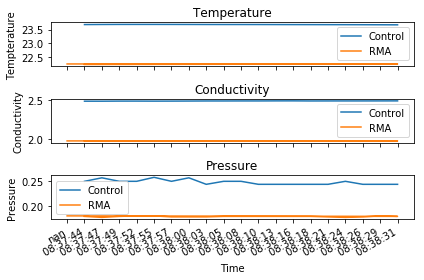

In [134]:
#Using real dummy data put cond, temp, pressure into 3 comparison graphs
##import data from our two sbe files 
control = pd.read_csv('SBE37.cap')
control = control.drop(control.index[0])
rma = pd.read_csv('SBE19_noh', names=["Temperature", 'Conductivity', 'Pressure', 'Oxygen Temperature', 'Dissolved Oxygen', 'Salinity', 'Sound Velocity'])[:21]
rma = rma.drop(rma.index[0])

%matplotlib inline

plt.figure(1)

#generate Temperature subplot
plt.subplot(311)
plt.plot(control[' Time'], control[' Temperature'], label = "Control")
plt.plot(control[' Time'], rma['Temperature'], label = "RMA")
plt.gcf().autofmt_xdate()
plt.title("Temperature")
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Tempterature")

#conductivity
plt.subplot(312)
plt.plot(control[' Time'], control[' Conductivity'], label='Control')
plt.plot(control[' Time'], rma['Conductivity'], label='RMA')
plt.gcf().autofmt_xdate()
plt.title("Conductivity")
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Conductivity")

#pressure
plt.subplot(313)
plt.plot(control[' Time'], control[' Pressure'], label='Control')
plt.plot(control[' Time'], rma['Pressure'], label='RMA')
plt.gcf().autofmt_xdate()
plt.title("Pressure")
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Pressure")


plt.tight_layout()
plt.show()



In [ ]:
#Calculate maximum difference 
p